In [55]:
import gcp.storage as storage

# Orders

In [2]:
%%sql
SELECT COUNT(*) FROM [datalab-projects-1331:xjk_algo_comp_test.orders]

f0_
1110625


Let's see what dates have orders in the test dataset

In [43]:
%%sql --module orders_by_date
SELECT date, COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
GROUP BY date
ORDER BY date

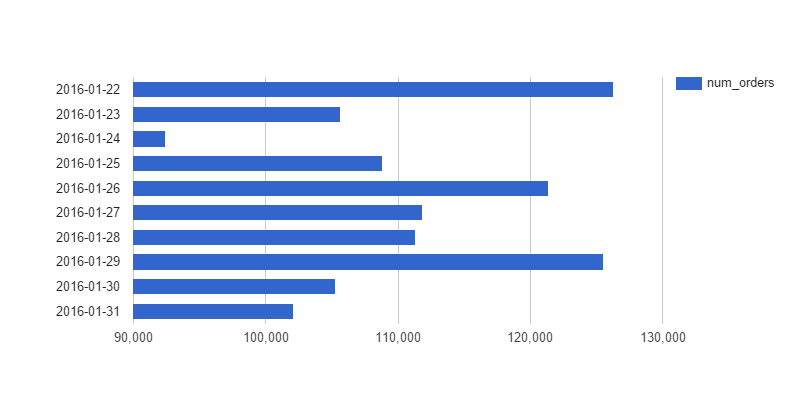

In [44]:
%%chart bars --data orders_by_date
height: 400

Looks like data from date 22 to 31 are available. Date 24 and 31 seems to contain less orders, is this the same with training data? We will look into this again later when exploring training data. Looks like they are the same day in week: Sunday.

In [47]:
%%sql
SELECT date, COUNT(*) AS num_orders, FIRST(day_in_week) AS day_in_week
FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
GROUP BY date
ORDER BY date

date,num_orders,day_in_week
2016-01-22,126309,5
2016-01-23,105634,6
2016-01-24,92437,0
2016-01-25,108791,1
2016-01-26,121362,2
2016-01-27,111815,3
2016-01-28,111343,4
2016-01-29,125552,5
2016-01-30,105278,6
2016-01-31,102104,0


And now, let's compare with timeslots in requested predictions to find a pattern:

In [63]:
item = storage.Item('datalab-projects-1331-datalab','data/timeslots_to_test2.txt')
slots = map(lambda x: x.strip(), item.read_from().strip().split('\n'))
print(slots)

['2016-01-23-46', '2016-01-23-58', '2016-01-23-70', '2016-01-23-82', '2016-01-23-94', '2016-01-23-106', '2016-01-23-118', '2016-01-23-130', '2016-01-23-142', '2016-01-25-58', '2016-01-25-70', '2016-01-25-82', '2016-01-25-94', '2016-01-25-106', '2016-01-25-118', '2016-01-25-130', '2016-01-25-142', '2016-01-27-46', '2016-01-27-58', '2016-01-27-70', '2016-01-27-82', '2016-01-27-94', '2016-01-27-106', '2016-01-27-118', '2016-01-27-130', '2016-01-27-142', '2016-01-29-58', '2016-01-29-70', '2016-01-29-82', '2016-01-29-94', '2016-01-29-106', '2016-01-29-118', '2016-01-29-130', '2016-01-29-142', '2016-01-31-46', '2016-01-31-58', '2016-01-31-70', '2016-01-31-82', '2016-01-31-94', '2016-01-31-106', '2016-01-31-118', '2016-01-31-130', '2016-01-31-142']


Test dataset contains all the dates used in requested predictions.

How about the timeslots? Let's plot number of orders of all timeslots in date 2016-01-22.

In [36]:
%%sql --module orders_by_timeslot
SELECT FIRST(timeslot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
WHERE date IN ('2016-01-22')
GROUP BY date, timeofday_slot
ORDER BY date, timeofday_slot

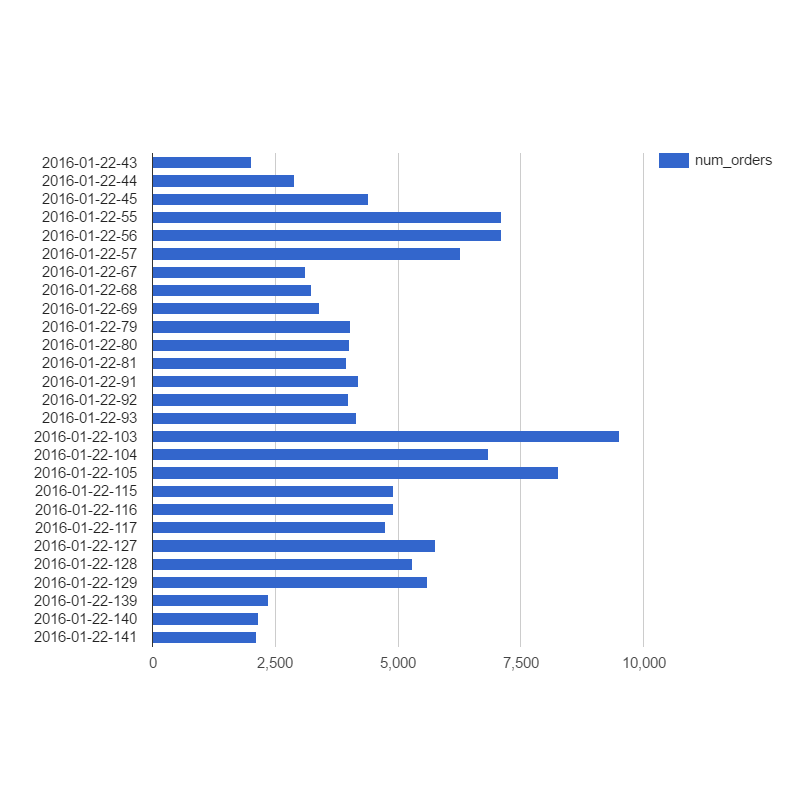

In [49]:
%%chart bars --data orders_by_timeslot
height: 800

Interesting. Looks like data from three timeslots prior to each timeslot to predict are available (for example, orders from 2016-01-22-43, 2016-01-22-44, 2016-01-22-45 are used to predict gaps in 2016-01-22-46)

In [69]:
%%sql --module orders_by_timeofday_slot
SELECT FIRST(timeofday_slot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
GROUP BY timeofday_slot
ORDER BY timeofday_slot

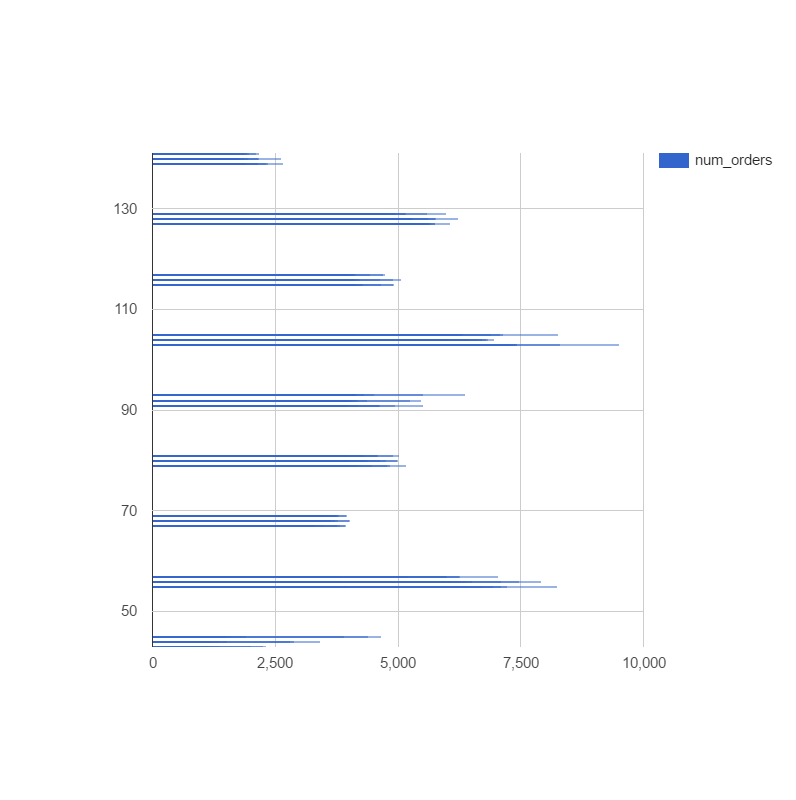

In [70]:
%%chart bars --data orders_by_timeofday_slot
height: 800

In [52]:
%%sql --module orders_by_timeslot3
SELECT FIRST(timeslot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp_test.orders]
WHERE date IN ('2016-01-24')
GROUP BY date, timeofday_slot
ORDER BY date, timeofday_slot

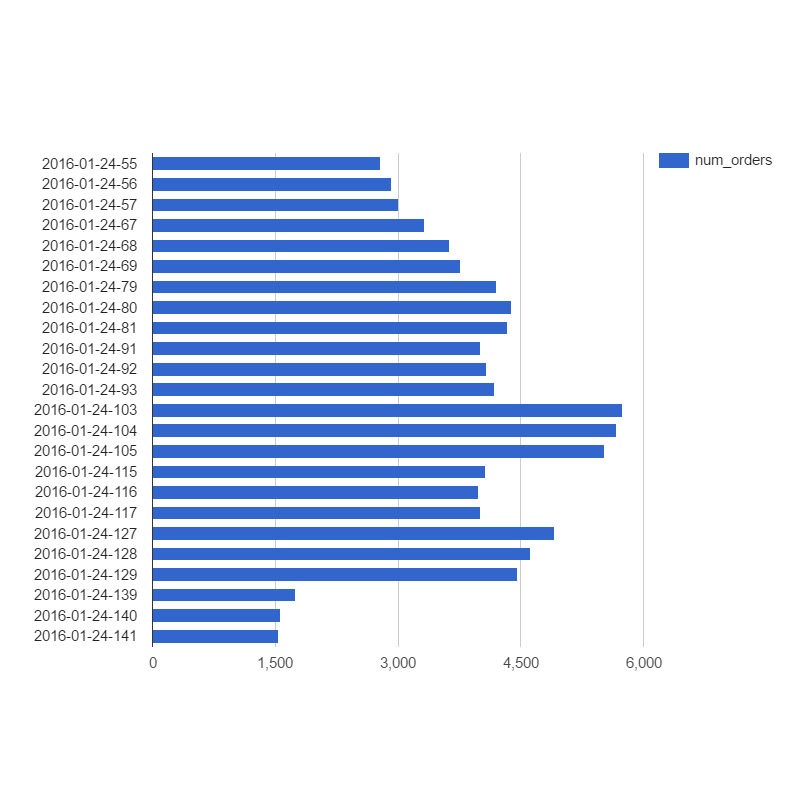

In [53]:
%%chart bars --data orders_by_timeslot3
height: 800

In [1]:
%%sql
SELECT COUNT(*) FROM [datalab-projects-1331:xjk_algo_comp.orders]

f0_
8540614
